In [2]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("parkinsons.data")

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# now remove the status from data set and add it in to the last
df1=df.pop('status')
df['status']=df1

In [6]:
# by using describe we caluclating the count,mean,std,min,25%,50%,75%,max...:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [23]:
# Get the features and labels
features = df.loc[:,df.columns != 'status'].values[:,1:]
labels=df.loc[:,'status'].values

In [24]:
# Get the label of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


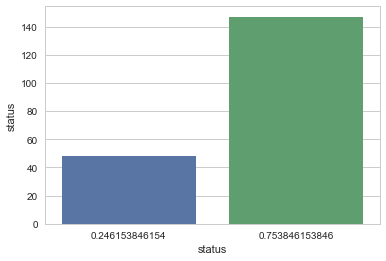

In [25]:
sns.set(style="whitegrid")
ax = sns.barplot(x=df.status.value_counts(1), y=df.status.value_counts(0))

In [26]:
# so finally we concluded there are 147 people affected with pd...

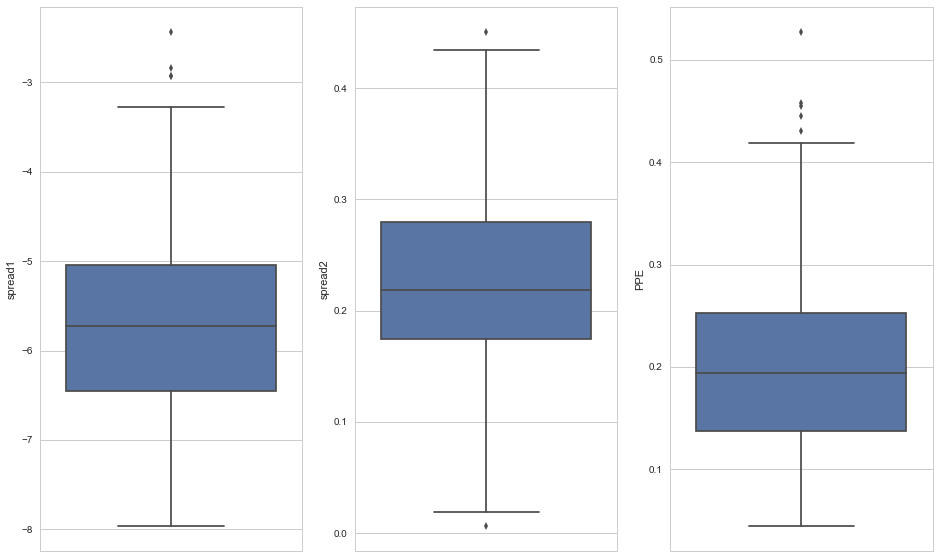

In [27]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=df, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=df, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=df,ax=ax[2],orient='v')

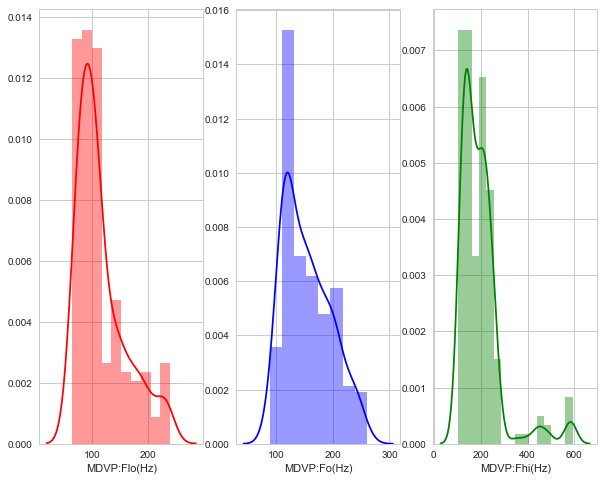

In [28]:
fig, ax = plt.subplots(1,3,figsize=(10,8))
sns.distplot(df['MDVP:Flo(Hz)'],ax=ax[0],color="r")
sns.distplot(df['MDVP:Fo(Hz)'],ax=ax[1],color="b")
sns.distplot(df['MDVP:Fhi(Hz)'],ax=ax[2],color="g")

In [29]:
# The measures of vocal fundamental frequency are shown above. 
#There is a positive skewness for minimum vocal fundemental frequency
# with more high values between 75Hz and 125Hhz. The average vocal 
#frequency is almost normally distributed with more values
# ranging 115Hz and 130Hz. The high vocal frequency does not have 
#any skewness, but some range of values are at the right most tail

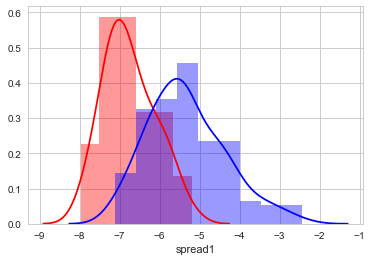

In [30]:
#Bi Variate analysis:
sns.distplot( df[df.status == 0]['spread1'], color = 'R')
sns.distplot( df[df.status == 1]['spread1'], color = 'B')

In [31]:
# Spread1 is normally distributed between person who have PD and who is normal.
# People who have spread1 between - 8.5 and -7.5 are more and they are normal.
# People whose spread1 is between -6.5 and -5 are having PD

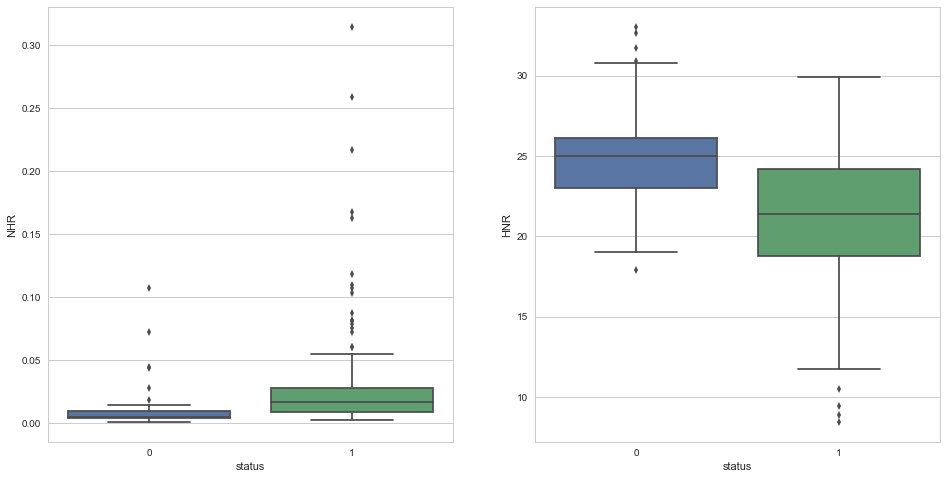

In [32]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=df,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=df,ax=ax[1])

In [33]:
# People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio.
# Also, looking into the HNR ratio people who have PD have lower levels in the same.

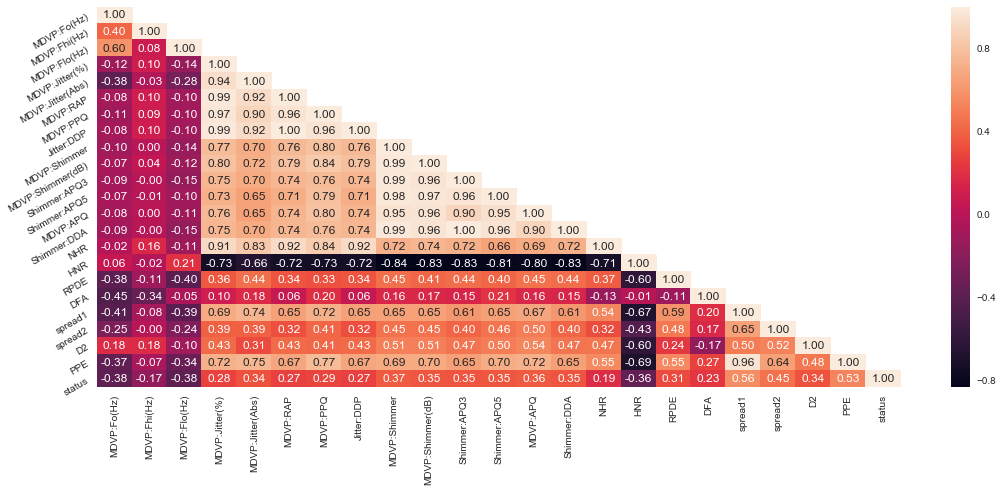

In [34]:
# Correlation comparision with heat map
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":
3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [35]:
# MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
# MDVP:Shimmer has a very correlation with
# MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. 
#This may be because multi-dimensinal voice programs analysis is closely related with these variables
#The target variable status has a weak positive corelation with spread1

In [36]:
# Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. 
# The MinMaxScaler transforms features by scaling them to a given range. 
# The fit_transform() method fits to the data and then transforms it.
# We don’t need to scale the labels.

In [37]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

C:\Users\YASWANTH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
#spliting of dataset only 20% of testing
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)


In [39]:
# by training the model using the XGB classifier
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [40]:
#for accuracy of classification @GURRAM
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.8717948718
